In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

os.chdir("../")
from scripts import utils
from pathlib import Path
import matplotlib.gridspec as gridspec
from tqdm.auto import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
from mlxtend.evaluate import feature_importance_permutation
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.utils.estimator_checks import check_estimator
from mlxtend.feature_selection import (
    SequentialFeatureSelector,
)
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
import matplotlib.ticker as ticker
import distclassipy as dcpy

In [4]:
with open("settings.txt") as f:
    settings_dict = json.load(f)
seed_val = settings_dict["seed_choice"]
np.random.seed(seed_val)
sns_dict = settings_dict["sns_dict"]
sns.set_theme(**sns_dict)

In [5]:
all_metrics = settings_dict["all_metrics"]

In [6]:
features = pd.read_parquet("data/reduced_balancedfeatures_LATEST.parquet")
features["class"].value_counts()

class
CEP     683
DSCT    683
EB      683
RRL     683
Name: count, dtype: int64

In [7]:
features = features.sample(frac=1)

In [8]:
y_df = features["class"]
X_df = features.drop(["Coordinate_x", "Coordinate_y", "Coordinate_z", "class"],axis=1)

In [9]:
y = y_df.to_numpy()
X = X_df.to_numpy()

### Distance Based

In [10]:
all_metrics = settings_dict["all_metrics"]

scoring = "f1_macro"

In [11]:
allns = []
all_selected_scores = []
all_metric_strs = []

Metric:   0%|          | 0/18 [00:00<?, ?it/s]

******************** Euclidean ********************
Euclidean: Selected 10 features: ['g-r', 'r-i', 'Period_band_i', 'Power_rate_4', 'Harmonics_phase_2_r', 'Harmonics_phase_2_i', 'Harmonics_phase_6_z', 'SPM_A_Y', 'SPM_chi_r', 'positive_fraction_z']


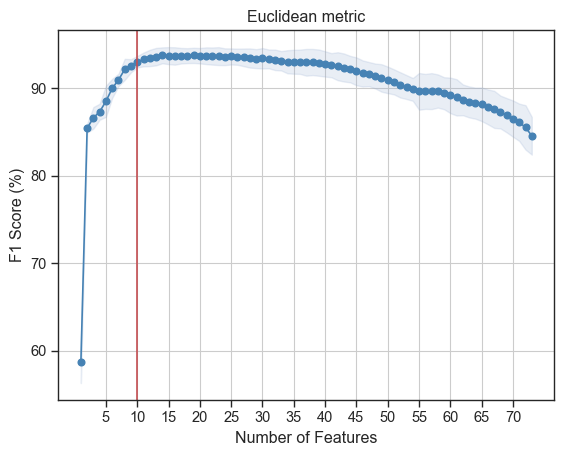

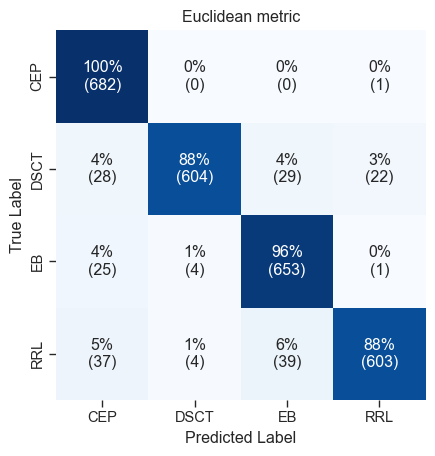

F1 = 93.03 %
Accuracy = 93.05 %
Matthew's Coefficient = 90.87 %
******************** Braycurtis ********************
Braycurtis: Selected 16 features: ['r-i', 'i-z', 'Multiband_period', 'Harmonics_mag_6_i', 'Period_band_i', 'delta_period_i', 'Power_rate_4', 'Harmonics_phase_2_i', 'Harmonics_phase_4_i', 'Harmonics_phase_2_z', 'SPM_A_g', 'SPM_A_r', 'SPM_tau_fall_r', 'SPM_A_i', 'SPM_A_Y', 'SPM_chi_i']


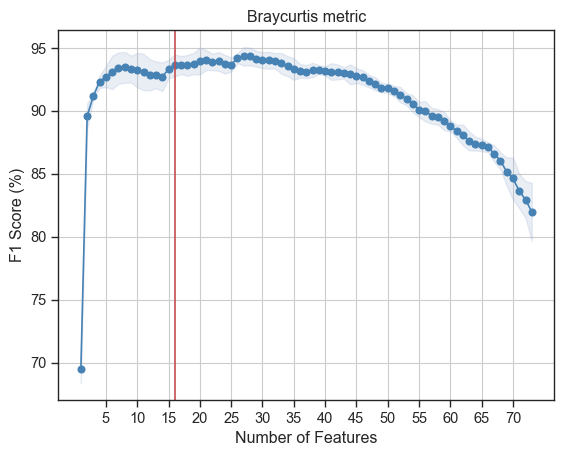

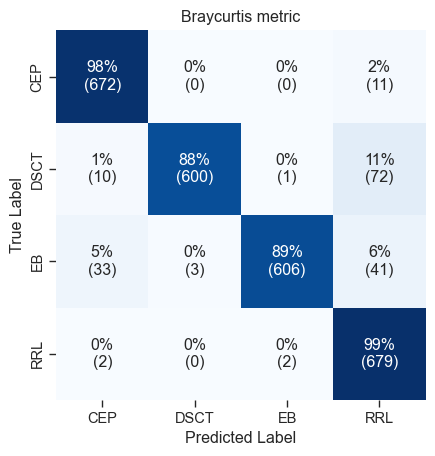

F1 = 93.63 %
Accuracy = 93.59 %
Matthew's Coefficient = 91.68 %
******************** Canberra ********************
Canberra: Selected 8 features: ['i-z', 'Multiband_period', 'Harmonics_phase_2_r', 'Harmonics_phase_6_r', 'Harmonics_phase_2_i', 'Harmonics_phase_4_i', 'Harmonics_phase_2_z', 'SPM_A_Y']


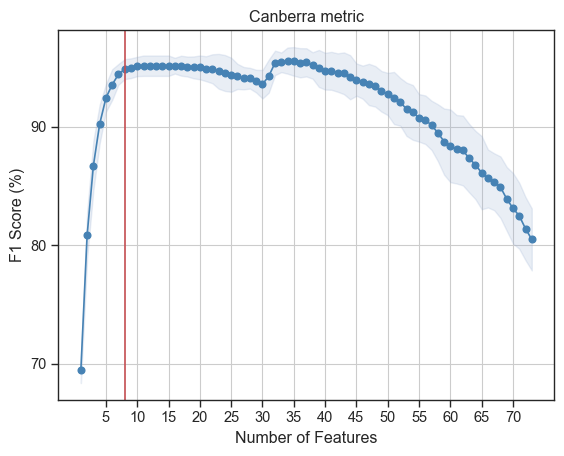

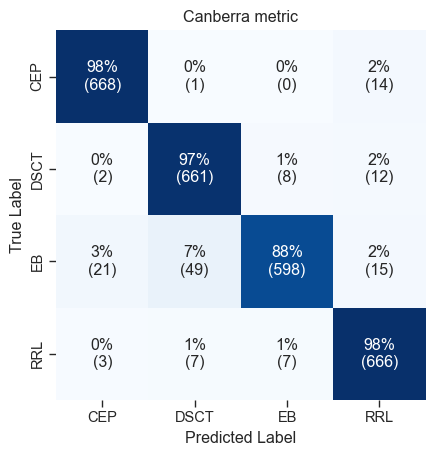

F1 = 94.87 %
Accuracy = 94.91 %
Matthew's Coefficient = 93.27 %
******************** Cityblock ********************
Cityblock: Selected 9 features: ['g-r', 'i-z', 'Period_band_i', 'Power_rate_2', 'Harmonics_phase_2_r', 'Harmonics_phase_2_i', 'Harmonics_phase_2_z', 'SPM_A_Y', 'SPM_chi_z']


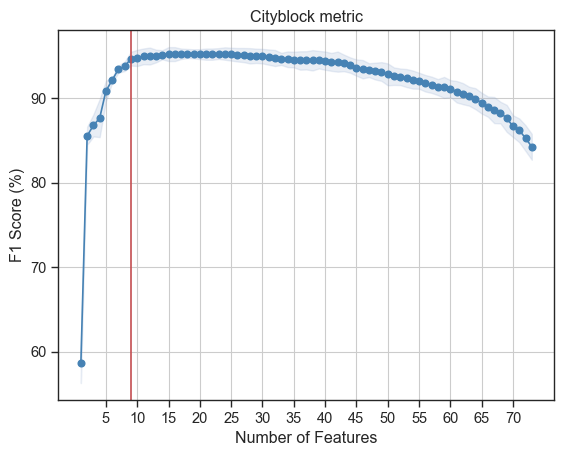

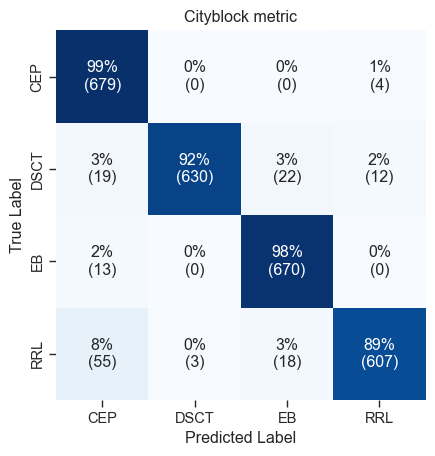

F1 = 94.65 %
Accuracy = 94.66 %
Matthew's Coefficient = 92.99 %
******************** Chebyshev ********************
Chebyshev: Selected 8 features: ['g-r', 'i-z', 'Period_band_i', 'delta_period_i', 'Power_rate_4', 'Harmonics_phase_2_i', 'SPM_A_z', 'SPM_A_Y']


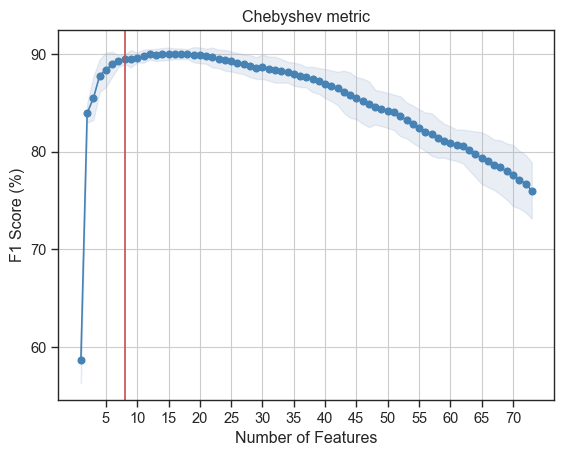

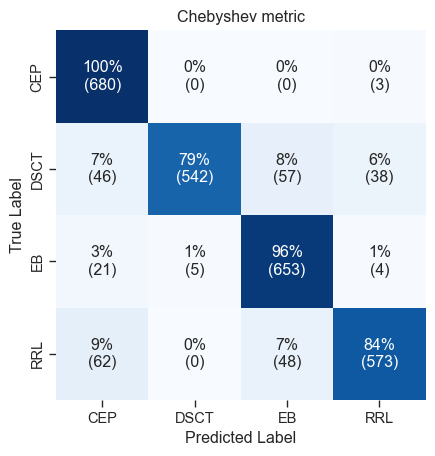

F1 = 89.50 %
Accuracy = 89.60 %
Matthew's Coefficient = 86.48 %
******************** Clark ********************
Clark: Selected 9 features: ['r-i', 'Multiband_period', 'Power_rate_1_4', 'Harmonics_phase_2_r', 'Harmonics_phase_4_r', 'Harmonics_phase_2_i', 'Harmonics_phase_2_z', 'Harmonics_phase_4_z', 'SPM_A_Y']


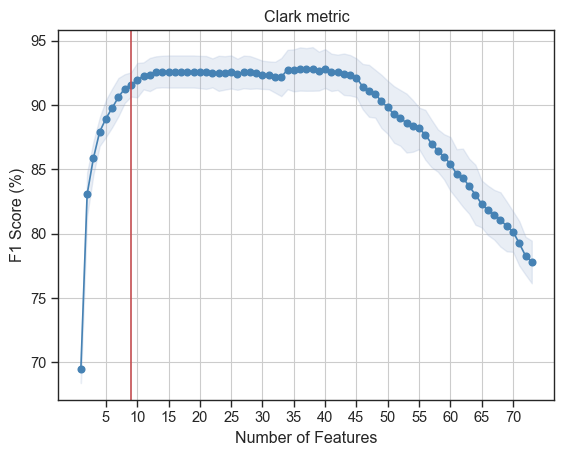

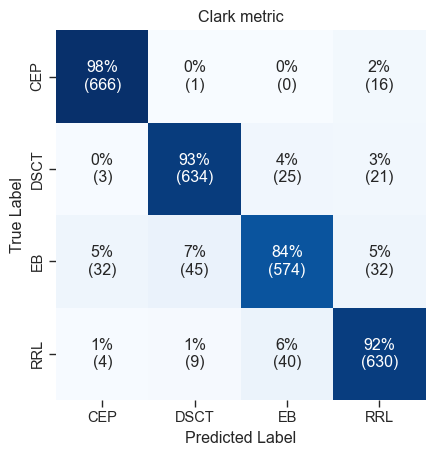

F1 = 91.60 %
Accuracy = 91.65 %
Matthew's Coefficient = 88.89 %
******************** Correlation ********************
Correlation: Selected 9 features: ['g-r', 'Period_band_i', 'delta_period_i', 'Power_rate_1_2', 'Harmonics_phase_4_r', 'Harmonics_phase_4_i', 'Harmonics_phase_4_z', 'SPM_A_g', 'SPM_A_Y']


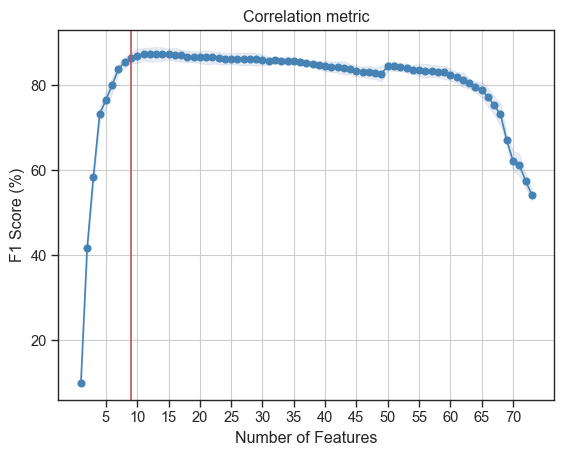

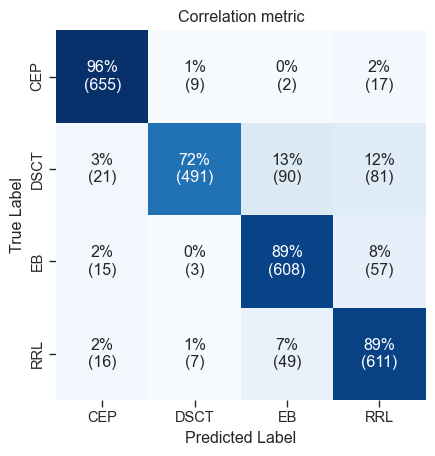

F1 = 86.45 %
Accuracy = 86.57 %
Matthew's Coefficient = 82.40 %
******************** Cosine ********************
Cosine: Selected 10 features: ['g-r', 'r-i', 'i-z', 'Multiband_period', 'PPE', 'Period_band_i', 'Power_rate_1_4', 'Harmonics_phase_3_i', 'SPM_A_g', 'SPM_A_z']


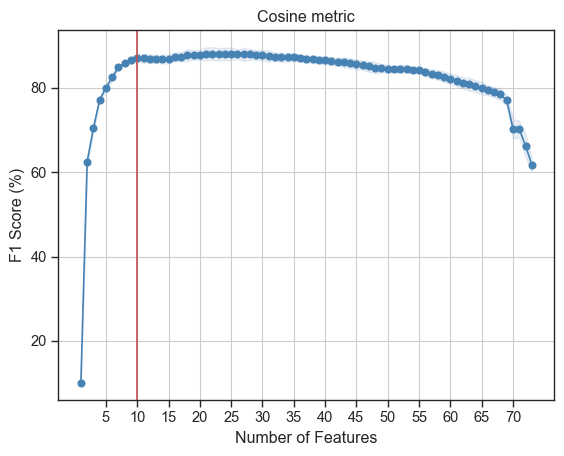

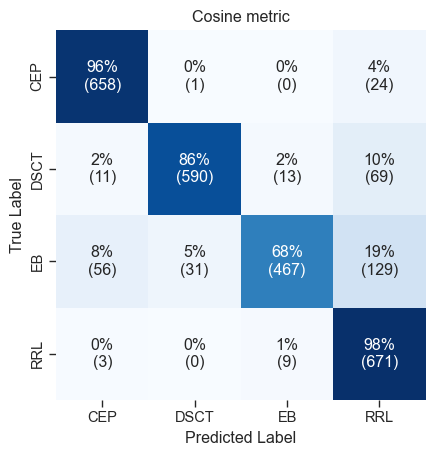

F1 = 87.13 %
Accuracy = 87.34 %
Matthew's Coefficient = 83.77 %
******************** Hellinger ********************
Hellinger: Selected 9 features: ['r-i', 'Multiband_period', 'Power_rate_1_3', 'Harmonics_phase_2_r', 'Harmonics_phase_2_i', 'Harmonics_phase_4_i', 'SPM_gamma_i', 'SPM_gamma_Y', 'SPM_chi_r']


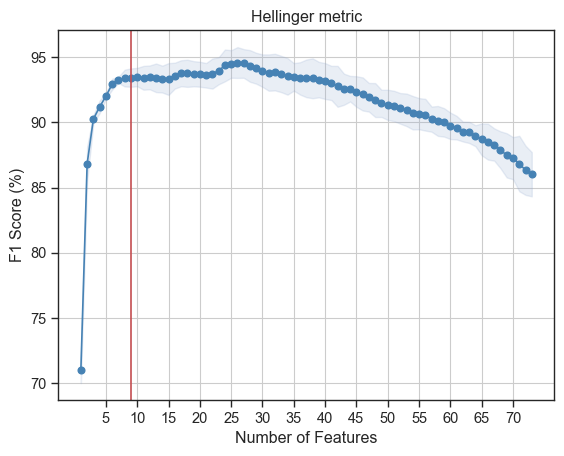

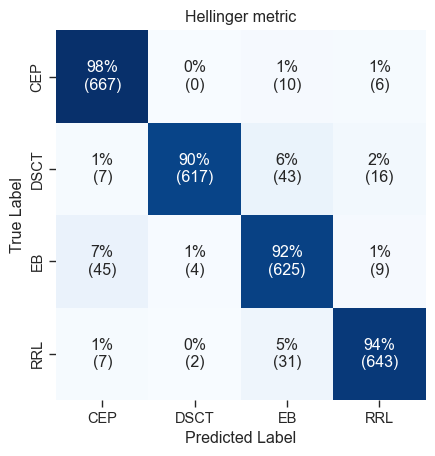

F1 = 93.43 %
Accuracy = 93.41 %
Matthew's Coefficient = 91.27 %
******************** Jaccard ********************


/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:569: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - (uv / (np.dot(u, u) + np.dot(v, v) - uv))
/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:569: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - (uv / (np.dot(u, u) + np.dot(v, v) - uv))
/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:569: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - (uv / (np.dot(u, u) + np.dot(v, v) - uv))
/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:569: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - (uv / (np.dot(u, u) + np.dot(v, v) - uv))
/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:569: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - (uv / (np.dot(u, u) + np.dot(v, v) - uv))


Jaccard: Selected 3 features: ['Multiband_period', 'Harmonics_phase_2_i', 'SPM_A_i']


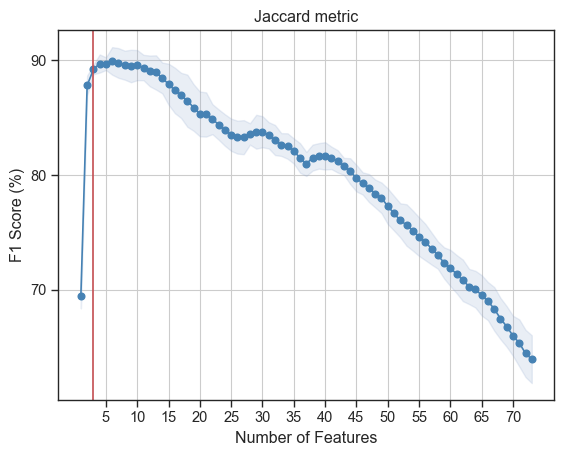

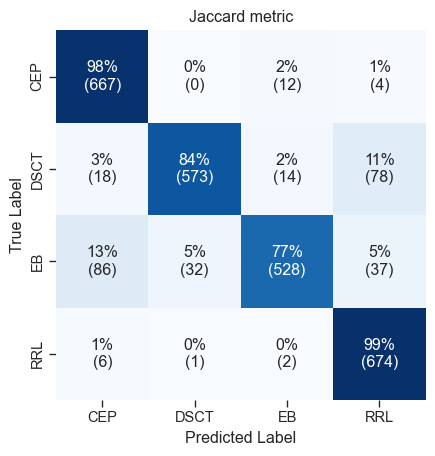

F1 = 89.21 %
Accuracy = 89.39 %
Matthew's Coefficient = 86.18 %
******************** Lorentzian ********************
Lorentzian: Selected 11 features: ['g-r', 'r-i', 'Multiband_period', 'PPE', 'Harmonics_chi_i', 'Harmonics_phase_2_i', 'Harmonics_phase_6_i', 'Harmonics_phase_2_z', 'Harmonics_phase_6_z', 'SPM_A_Y', 'SPM_chi_r']


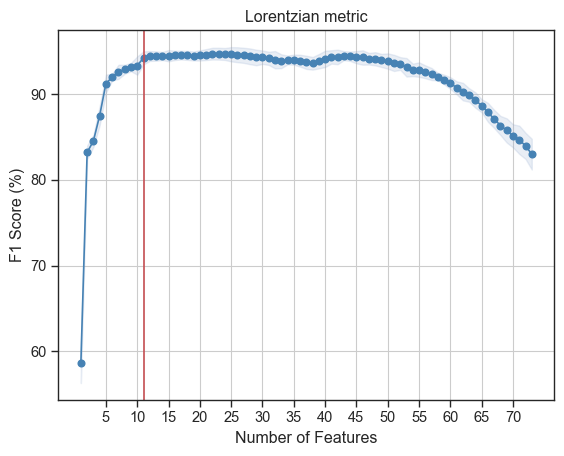

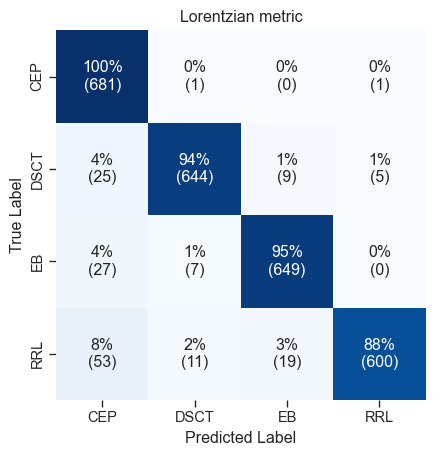

F1 = 94.24 %
Accuracy = 94.22 %
Matthew's Coefficient = 92.43 %
******************** Marylandbridge ********************


/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:642: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - (uvdot / np.dot(u, u) + uvdot / np.dot(v, v)) / 2
/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:642: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - (uvdot / np.dot(u, u) + uvdot / np.dot(v, v)) / 2
/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:642: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - (uvdot / np.dot(u, u) + uvdot / np.dot(v, v)) / 2
/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:642: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - (uvdot / np.dot(u, u) + uvdot / np.dot(v, v)) / 2
/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:642: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - (uvdot / np.dot(u, u) + uvdot / np.dot(v, v)) / 2
/Users/sidchaini/Research/DistClassiPy/d

Marylandbridge: Selected 12 features: ['g-r', 'delta_period_i', 'Power_rate_1_2', 'Harmonics_phase_4_z', 'Harmonics_phase_5_z', 'Harmonics_phase_7_z', 'SPM_tau_fall_g', 'SPM_tau_fall_r', 'SPM_tau_fall_i', 'SPM_tau_fall_z', 'SPM_A_Y', 'SPM_chi_i']


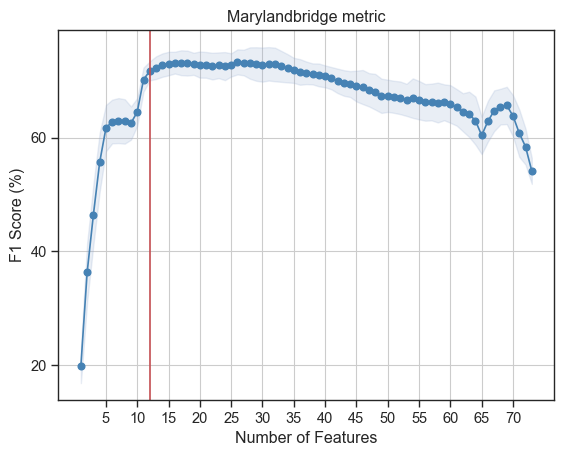

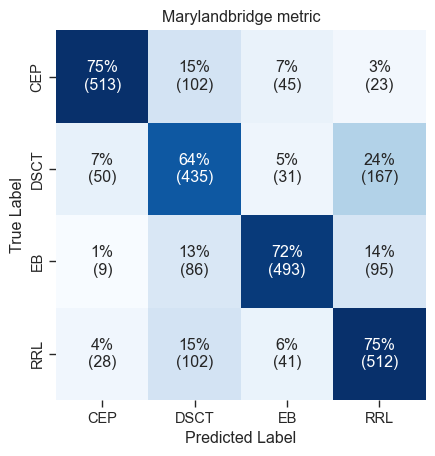

F1 = 71.80 %
Accuracy = 71.49 %
Matthew's Coefficient = 62.13 %
******************** Meehl ********************
Meehl: Selected 8 features: ['g-r', 'r-i', 'Multiband_period', 'Power_rate_1_2', 'Harmonics_phase_2_r', 'Harmonics_phase_4_z', 'SPM_A_Y', 'SPM_tau_fall_Y']


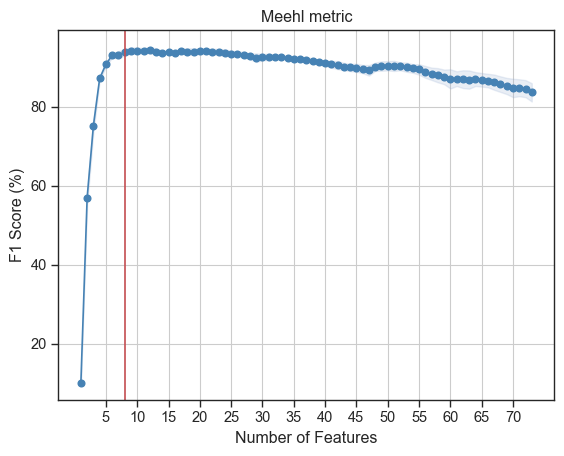

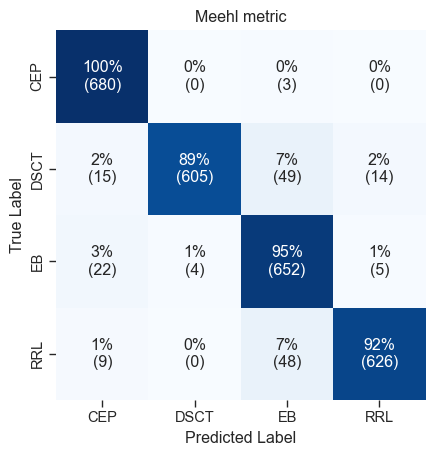

F1 = 93.83 %
Accuracy = 93.81 %
Matthew's Coefficient = 91.86 %
******************** Motyka ********************


/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:726: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(np.maximum(u, v)) / np.sum(u + v)
/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:726: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(np.maximum(u, v)) / np.sum(u + v)
/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:726: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(np.maximum(u, v)) / np.sum(u + v)
/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:726: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(np.maximum(u, v)) / np.sum(u + v)
/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:726: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(np.maximum(u, v)) / np.sum(u + v)


Motyka: Selected 16 features: ['r-i', 'i-z', 'Multiband_period', 'Harmonics_mag_6_i', 'Period_band_i', 'delta_period_i', 'Power_rate_4', 'Harmonics_phase_2_i', 'Harmonics_phase_4_i', 'Harmonics_phase_2_z', 'SPM_A_g', 'SPM_A_r', 'SPM_tau_fall_r', 'SPM_A_i', 'SPM_A_Y', 'SPM_chi_i']


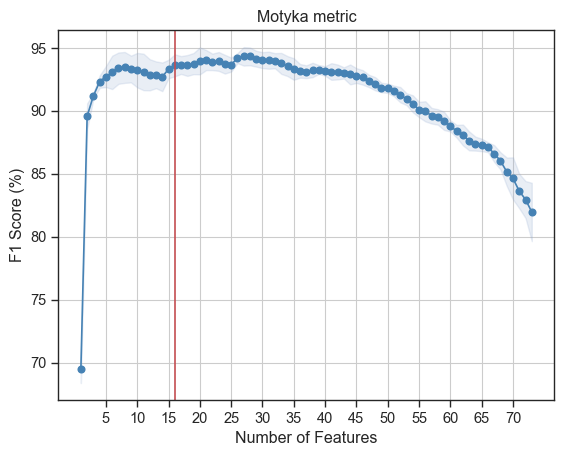

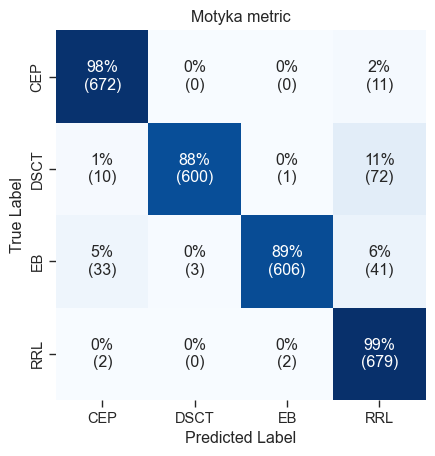

F1 = 93.63 %
Accuracy = 93.59 %
Matthew's Coefficient = 91.68 %
******************** Soergel ********************


/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:763: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(np.abs(u - v)) / np.sum(np.maximum(u, v))
/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:763: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(np.abs(u - v)) / np.sum(np.maximum(u, v))
/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:763: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(np.abs(u - v)) / np.sum(np.maximum(u, v))
/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:763: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(np.abs(u - v)) / np.sum(np.maximum(u, v))
/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:763: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(np.abs(u - v)) / np.sum(np.maximum(u, v))


Soergel: Selected 16 features: ['r-i', 'i-z', 'Multiband_period', 'Harmonics_mag_6_i', 'Period_band_i', 'delta_period_i', 'Power_rate_4', 'Harmonics_phase_2_i', 'Harmonics_phase_4_i', 'Harmonics_phase_2_z', 'SPM_A_g', 'SPM_A_r', 'SPM_tau_fall_r', 'SPM_A_i', 'SPM_A_Y', 'SPM_chi_i']


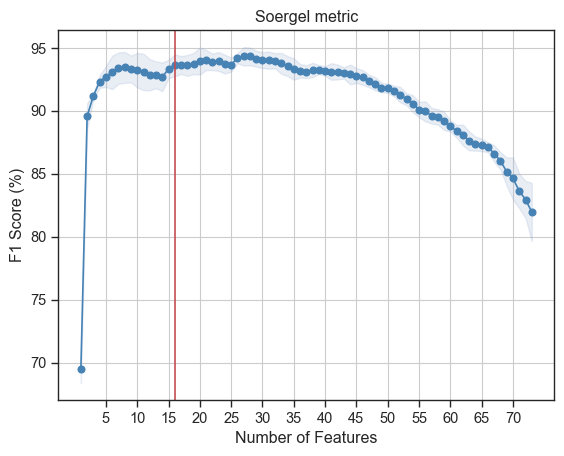

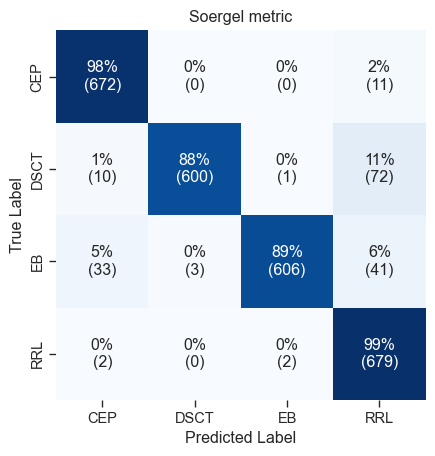

F1 = 93.63 %
Accuracy = 93.59 %
Matthew's Coefficient = 91.68 %
******************** Wave_Hedges ********************
Wave_Hedges: Selected 21 features: ['r-i', 'i-z', 'Multiband_period', 'SPM_t0_Y', 'Period_band_i', 'delta_period_i', 'Harmonics_phase_2_r', 'Harmonics_phase_4_r', 'Harmonics_phase_2_i', 'Harmonics_phase_4_i', 'Harmonics_phase_7_i', 'Harmonics_phase_2_z', 'SPM_gamma_g', 'SPM_tau_fall_r', 'SPM_A_i', 'SPM_gamma_i', 'SPM_tau_fall_i', 'SPM_tau_fall_z', 'SPM_A_Y', 'SPM_chi_z', 'Timespan']


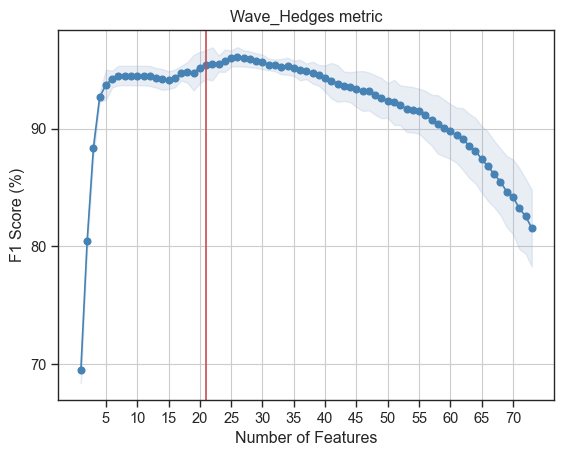

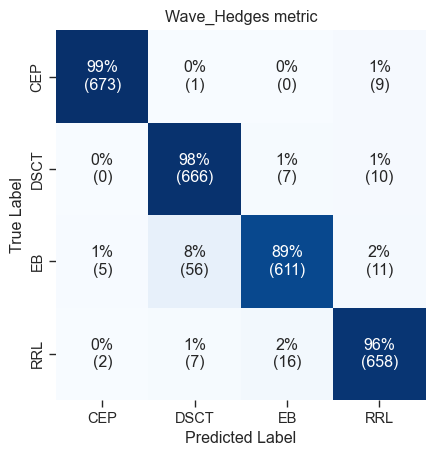

F1 = 95.45 %
Accuracy = 95.46 %
Matthew's Coefficient = 93.99 %
******************** Kulczynski ********************


/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:833: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sum(np.abs(u - v)) / np.sum(np.minimum(u, v))
/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:833: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sum(np.abs(u - v)) / np.sum(np.minimum(u, v))
/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:833: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sum(np.abs(u - v)) / np.sum(np.minimum(u, v))
/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:833: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(np.abs(u - v)) / np.sum(np.minimum(u, v))
/Users/sidchaini/Research/DistClassiPy/distclassipy/distances.py:833: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sum(np.abs(u - v)) / np.sum(np.minimum(u, v))
/Users/sidchaini/Research/DistClassiPy/distclassipy/distances

Kulczynski: Selected 16 features: ['r-i', 'i-z', 'Multiband_period', 'Harmonics_mag_6_i', 'Period_band_i', 'delta_period_i', 'Power_rate_4', 'Harmonics_phase_2_i', 'Harmonics_phase_4_i', 'Harmonics_phase_2_z', 'SPM_A_g', 'SPM_A_r', 'SPM_tau_fall_r', 'SPM_A_i', 'SPM_A_Y', 'SPM_chi_i']


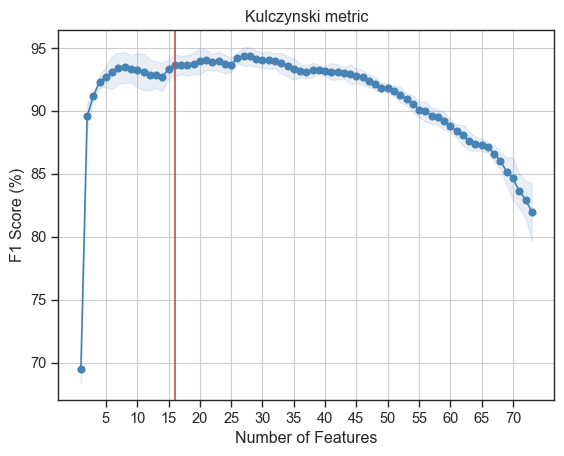

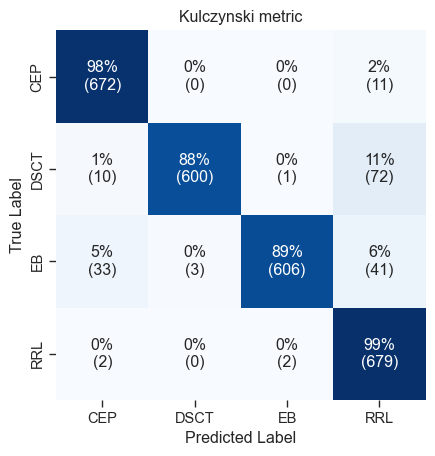

F1 = 93.63 %
Accuracy = 93.59 %
Matthew's Coefficient = 91.68 %
******************** Add_Chisq ********************
Add_Chisq: Selected 5 features: ['i-z', 'Multiband_period', 'Harmonics_phase_2_r', 'Harmonics_phase_2_i', 'SPM_chi_z']


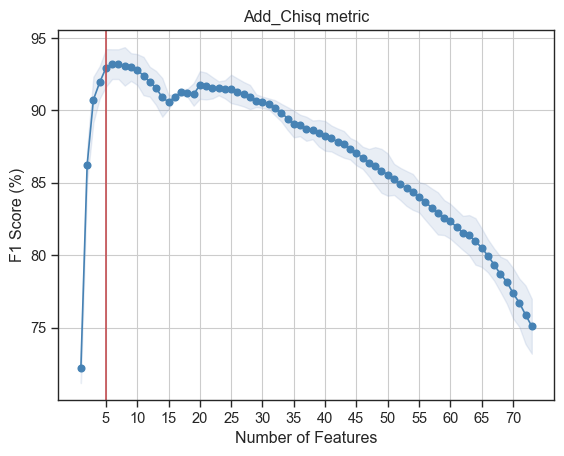

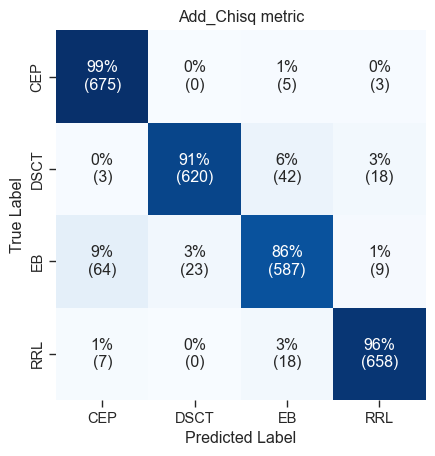

F1 = 92.93 %
Accuracy = 92.97 %
Matthew's Coefficient = 90.69 %


In [12]:
for metric in tqdm(all_metrics, desc="Metric", leave=True):
    metric_str = utils.get_metric_name(metric)
    locpath = os.path.join("results", metric_str)
    print("*" * 20, metric_str, "*" * 20)
    Path(locpath).mkdir(parents=True, exist_ok=True)

    # Sequential Feature Selection 1-31 features
    
    lcdc = dcpy.DistanceMetricClassifier(
        scale=True,
        central_stat="median",
        dispersion_stat="std",
        metric=metric,
    )
    
    feat_selector = SequentialFeatureSelector(
        lcdc,
        k_features=X.shape[1],
        scoring=scoring,
        forward=True,
        n_jobs=-1,
        verbose=0,
    ).fit(X_df, y_df)
    
    
    res_df = pd.DataFrame.from_dict(feat_selector.get_metric_dict()).T
    res_df.index.name = "num_feats"
    res_df["avg_score"] = res_df["avg_score"].astype("float")
    res_df = res_df.sort_values(by="avg_score", ascending=False)
    res_df.to_csv(f"{locpath}/sfs_allfeatures.csv")
    
    fig1 = plot_sfs(
        feat_selector.get_metric_dict(),
        kind="std_dev",
        # color=sns.color_palette("Paired")[1],
        # bcolor=sns.color_palette("Paired")[0],
        color="SteelBlue",
        bcolor="#93aad0",
        ylabel="F1 Score (%)",  # scoring
    )
    # plt.grid()
    
    tick_freq = 5
    plt.xticks(
        [x for x in list(feat_selector.get_metric_dict().keys()) if x % tick_freq == 0]
    )
    
    # Temp fix to get % instead of 0-1 values
    axtemp = plt.gca()
    axtemp.yaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, pos: "{0:g}".format(x * 100))
    )
    
    plt.locator_params(axis="y", nbins=6)
    plt.title(f"{metric_str.title()} metric")
    plt.savefig(f"{locpath}/sfs_allfeatures_plot.pdf", bbox_inches="tight")
    
    # Reloading to
    sfs_df = pd.read_csv(f"{locpath}/sfs_allfeatures.csv", index_col=0)
    feats_idx, feats = utils.load_best_features(sfs_df)
    
    print(f"{metric_str}: Selected {len(feats)} features: {feats}")
    plt.axvline(x=len(feats), color=sns.color_palette()[3], label="Selected features")
    # plt.legend()
    plt.savefig(f"{locpath}/sfs_allfeatures_plot_marked.pdf", bbox_inches="tight")
    plt.show()
    
    # Using the Selected Feature Subset For Making New Predictions
    
    # Cross validation
    lcdc = dcpy.DistanceMetricClassifier(
        scale=True,
        central_stat="median",
        dispersion_stat="std",
        metric=metric,
    )
    X_sfs = X[:, feats_idx]
    y_pred = cross_val_predict(lcdc, X_sfs, y, cv=5, n_jobs=-1)
    
    acc = accuracy_score(y, y_pred)
    f1score = f1_score(y, y_pred, average="macro")
    matthew_coef = matthews_corrcoef(y, y_pred)
    
    ax = utils.plot_cm(y_true=y, y_pred=y_pred)
    ax.set_title(f"{metric_str.title()} metric")
    plt.savefig(f"{locpath}/sfs_best_confusion_matrix.pdf", bbox_inches="tight")
    plt.show()
    
    dat = np.hstack([y_pred.reshape(-1, 1), y.reshape(-1, 1)])
    objs = X_df.index
    preds_best_df = pd.DataFrame(data=dat, columns=["y_pred", "y_true"], index=objs)
    preds_best_df.to_csv(f"{locpath}/preds_best.csv")
    
    print(
        f"F1 = {f1score*100:.2f} %\nAccuracy = {acc*100:.2f} %\nMatthew's Coefficient = {matthew_coef*100:.2f} %"
    )
    
    ## new
    allns.append(len(feats))
    all_selected_scores.append(f1score)
    all_metric_strs.append(metric_str)
    
    # Confidence calculation
    
    lcdc = dcpy.DistanceMetricClassifier(
        scale=True,
        central_stat="median",
        dispersion_stat="std",
        metric=metric,
    )
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_sfs, y, test_size=0.33, stratify=y, random_state=settings_dict["seed_choice"]
    )
    
    lcdc.fit(X_train, y_train)
    
    y_pred_test = lcdc.predict_and_analyse(X_test)
    y_testdf = pd.DataFrame(data=y_test, columns=["class"])
    y_testdf["pred"] = y_pred_test
    y_testdf.to_csv(f"{locpath}/testpreds_class.csv")
    
    lcdc.df_centroid_.to_csv(f"{locpath}/df_centroid.csv")
    lcdc.centroid_dist_df_.to_csv(f"{locpath}/centroid_dist_df.csv")
    if lcdc.dispersion_stat == "std":
        lcdc.df_std_.to_csv(f"{locpath}/df_std.csv")
    elif lcdc.dispersion_stat == "iqr":
        lcdc.df_iqr_.to_csv(f"{locpath}/df_iqr.csv")

In [13]:
summaryqdf = pd.DataFrame(
    data=np.array([allns, all_selected_scores]).T,
    index=all_metric_strs,
    columns=["Number of selected features", "Selected F1 Score"],
)
summaryqdf.to_csv(
    os.path.join(
        "results", "sfs_summary_scores_q1q5.csv"
    )
)
summaryqdf

,Number of selected features,Selected F1 Score
Euclidean,10.0,0.930271
Braycurtis,16.0,0.936267
Canberra,8.0,0.948737
Cityblock,9.0,0.946538
Chebyshev,8.0,0.895001
Clark,9.0,0.915989
Correlation,9.0,0.864521
Cosine,10.0,0.871334
Hellinger,9.0,0.934327
Jaccard,3.0,0.892085


In [14]:
summaryqdf.describe()

,Number of selected features,Selected F1 Score
count,18.000000,18.000000
mean,10.888889,0.912574
std,4.509974,0.055138
min,3.000000,0.718011
25%,8.250000,0.900248
50%,9.500000,0.935297
75%,15.000000,0.937799
max,21.000000,0.954488


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for DistanceMetricClassifier
param_grid = {
    "metric": all_metrics,
    "scale": [True, False],
    "central_stat": ["mean", "median"],
    "dispersion_stat": ["std", "iqr"],
}

# Initialize the classifier
distance_metric_classifier = dcpy.DistanceMetricClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=distance_metric_classifier,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=5,
)

# Fit GridSearchCV
grid_search.fit(X, y)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 score found: ", grid_search.best_score_)

Best parameters found:  {'central_stat': 'mean', 'dispersion_stat': 'std', 'metric': 'hellinger', 'scale': True}
Best F1 score found:  0.8830725594876132
